# Categorização de Repositórios Filtrados

Este script classifica repositórios de software com base em palavras-chave associadas a suas descrições e tópicos, utilizando dados previamente filtrados em um arquivo CSV.

## Importação de Bibliotecas

- **pandas (`pd`)**: Para manipulação de dados em formato tabular.
- **matplotlib.pyplot (`plt`)**: Para visualização de gráficos.

## Estrutura do Código

1. **Importação de Bibliotecas**
2. **Carregamento de Dados**
3. **Definição de Palavras-Chave**
4. **Definição de Pesos**
5. **Função para Classificação**
6. **Aplicação da Classificação**
7. **Exportação dos Resultados**
8. **Geração de Gráficos**

## Funcionalidades Principais
1. **Carregamento de Dados**: 
   - Lê os dados de repositórios de um arquivo CSV contendo informações como descrição e tópicos.

2. **Classificação por Categorias**:
   - Define quatro categorias baseadas em palavras-chave:
     - **Ferramenta UX**: Ferramentas como sistemas de design, protótipos e wireframes.
     - **Aplicação UX**: Aplicações com foco em experiência do usuário (UI/UX).
     - **Componente UX**: Bibliotecas e componentes reutilizáveis para interfaces.
     - **Outra Classificação**: Projetos relacionados a automação, bots ou IA.

3. **Processo de Classificação**:
   - Cada repositório recebe uma pontuação para cada categoria, com base em palavras-chave encontradas na descrição e nos tópicos.
   - A categoria com maior pontuação é atribuída ao repositório.

4. **Exportação dos Resultados**:
   - Salva os repositórios classificados e não classificados em arquivos CSV separados.

5. **Visualização dos Resultados**:
   - Gera um gráfico de barras mostrando a distribuição de repositórios por categoria e salva a imagem em um arquivo.

6. **Gráfico de Distribuição**:
   - Um gráfico de barras indicando a quantidade de repositórios por categoria é salvo em `distribuicao_repositorios_categoria.png`.


Categorização concluída.
Repositórios não classificados salvos em '../Database/Resultados-Busca/repositorios_nao_classificados.csv'.
Repositórios classificados salvos em '../Database/Resultados-Busca/repositorios_categorizados.csv'.


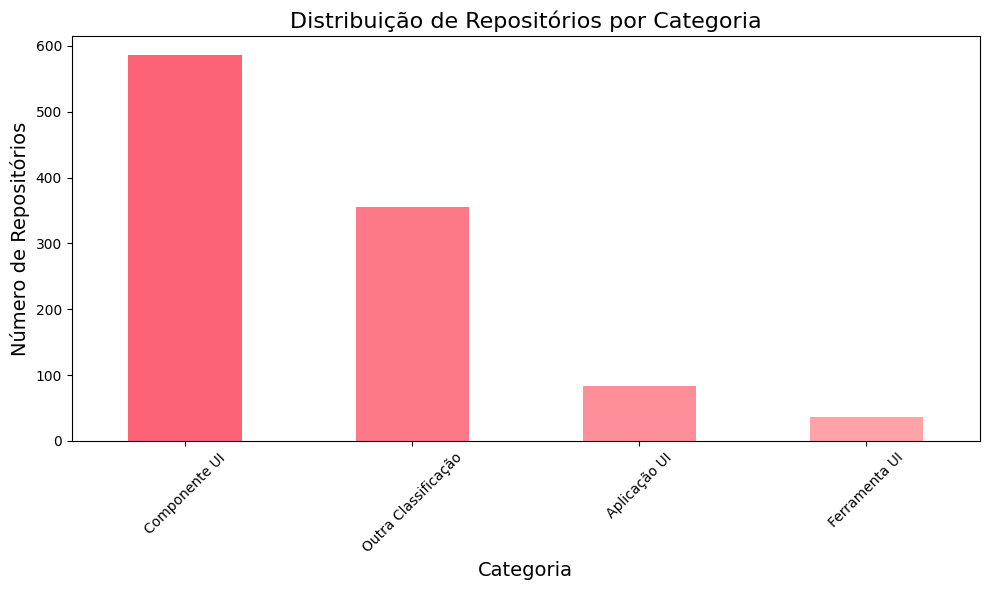

Gráfico salvo em '../Image/Resultados-Busca/distribuicao_repositorios_categoria.png'.


In [2]:
import pandas as pd  # Importa a biblioteca pandas para manipulação de dados
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para criação de gráficos


# Carregar dados do CSV
df = pd.read_csv('../Database/Resultados-Busca/repos_with_files.csv')  # Lê o arquivo CSV com dados dos repositórios

# Definindo palavras-chave para classificação
tool_keywords = [
    'prototype', 
    'wireframe', 
    'ux tool', 
    'design system', 
    'testing tool', 
    'sketch', 
    'material design', 
    'roadmap', 
    'guide', 
    'skills', 
    'color scheme', 
    'color palette', 
    'visual design'
]
application_keywords = [
    'app', 
    'mobile', 
    'website', 
    'user-friendly', 
    'UI', 
    'application', 
    'UI/UX'
]
automation_keywords = [
    'bot', 
    'automation', 
    'whatsapp', 
    'interaction', 
    'customer service', 
    'media sending', 
    'ai', 
    'artificial intelligence'
]
component_keywords = [
    'UI Library',
     'library',
     'component',
     'UI component',
     'plugin',
     'widget',
     'ui kit',
     'bootstrap',
     'react',
     'vue',
     'angular',
     'react native',
     'tailwind css',
     'unstyled',
     'accessible ui'
]

# Definindo pesos para as palavras-chave
keyword_weights = {
    'Outra Classificação': 2,  # Peso para a categoria de automação
    'Ferramenta UI': 1.5,      # Peso para ferramentas de UX
    'Componente UI': 1.2,       # Peso para componentes de UX
    'Aplicação UI': 1           # Peso para aplicações de UX
}

# Função para classificar repositórios com base na descrição e tópicos
def classify_repository(description, topics):
    description = str(description).lower() if pd.notna(description) else ''  # Converte a descrição para minúsculas
    topics = str(topics).lower() if pd.notna(topics) else ''  # Converte os tópicos para minúsculas

    # Calcular pontuações para cada categoria
    scores = {}
    for category, keywords in [
        ('Outra Classificação', automation_keywords),
        ('Ferramenta UI', tool_keywords),
        ('Componente UI', component_keywords),
        ('Aplicação UI', application_keywords)
    ]:
        # Calcula a pontuação somando os pesos das palavras-chave encontradas
        score = sum(1 for word in keywords if word in description or word in topics)
        scores[category] = score * keyword_weights[category]  # Multiplica pela ponderação da categoria

    # Determinar a classificação com base na maior pontuação
    classification = max(scores, key=scores.get)  # Seleciona a categoria com a maior pontuação

    return classification  # Retorna a classificação

# Aplicar a função de classificação aos repositórios
df['category'] = df.apply(lambda row: classify_repository(row['description'], row['topics']), axis=1)

# Filtrar os repositórios classificados
non_classified_df = df[df['category'] == 'Não classificado']  # DataFrame para repositórios não classificados
non_classified_df = df[df['category'] == 'Outra Classificação']  # DataFrame para repositórios classificados como "Outra Classificação"
classified_df = df[df['category'] != 'Não classificado']  # DataFrame para repositórios classificados
classified_df = df[df['category'] != 'Outra Classificação']  # Atualiza DataFrame para repositórios classificados

# Salvar os resultados em arquivos CSV
non_classified_output_path = '../Database/Resultados-Busca/repositorios_nao_classificados.csv'  # Caminho de saída para repositórios não classificados
classified_output_path = '../Database/Resultados-Busca/repositorios_categorizados.csv'  # Caminho de saída para repositórios classificados

# Exporta os DataFrames para arquivos CSV
non_classified_df.to_csv(non_classified_output_path, index=False, sep=',', decimal=',')  # Salva repositórios não classificados
classified_df.to_csv(classified_output_path, index=False, sep=',', decimal=',')  # Salva repositórios classificados

# Mensagens de conclusão
print(f"Categorização concluída.")
print(f"Repositórios não classificados salvos em '{non_classified_output_path}'.")
print(f"Repositórios classificados salvos em '{classified_output_path}'.")

# Contar o número de repositórios em cada categoria
category_counts = df['category'].value_counts()

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
category_counts.plot(kind='bar', color=['#fd213e', '#fe4054', '#fe5e6b', '#ff7d81'], alpha=0.7)

# Adicionar título e rótulos
plt.title('Distribuição de Repositórios por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Número de Repositórios', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Salvar o gráfico em um arquivo no diretório especificado
save_path = '../Image/Resultados-Busca/distribuicao_repositorios_categoria.png'  # Caminho para salvar a imagem
plt.savefig(save_path)  # Salva a figura no caminho especificado

# Exibir a figura
plt.show()

# Mensagem de conclusão
print(f"Gráfico salvo em '{save_path}'.")
